In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

yf.pdr_override()

In [162]:
comp_list = ['GS','WFC','GOOGL','META','ROKU']

In [163]:
end_date = datetime.now()
start_date = datetime(end_date.year - 10 , end_date.month, end_date.day)
stock_data = []
for company in comp_list:
    comp_stock = yf.download(company,start_date,end_date)
    stock_data.append(comp_stock)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [166]:
def run_model_company(company_index):
  company_name = comp_list[company_index]
  print(company_name)
  company = stock_data[company_index]
  plt.figure(figsize=(16,8))
  plt.plot(company['Close'])
  plt.show()
  company_close_df = company.filter(['Close'])
  company_data = company_close_df.values
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_company = scaler.fit_transform(company_data)
  training_data_len = int(np.ceil( len(company_data) * .9 ))
  train_data = scaled_company[0:training_data_len, : ]
  # print(train_data.shape)
  num_days = 30
  x_train = []
  y_train = []

  for i in range(0, len(train_data) - num_days):
      x_train.append(train_data[i:i + num_days, 0])
      y_train.append(train_data[i+num_days,0])

  x_train = np.array(x_train)
  y_train = np.array(y_train)
  # print(x_train.shape,y_train.shape)
  x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
  # print(x_train.shape)
  model = Sequential()
  # model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  # model.add(LSTM(128,return_sequences = False))
  # model.add(Dense(32))
  # model.add(Dense(1))
  model.add(GRU(32,return_sequences=True,input_shape=(x_train.shape[1],1)))
  model.add(GRU(32,return_sequences=True))
  model.add(GRU(32,return_sequences=True))
  model.add(GRU(32))
  model.add(Dense(1))
  model.compile(optimizer= 'adam', loss ='mean_squared_error')
  model.fit(x_train,y_train,batch_size = 8,epochs = 3)
  test_data = scaled_company[training_data_len - num_days: , :]
  # print(len(test_data))
  x_test, y_test = [], company_data[training_data_len:,:]
  # print(len(x_test),y_test.shape)
  for i in range(0, len(test_data) -num_days):
    x_test.append(test_data[i:i+num_days,0])
  x_test = np.array(x_test)
  # print(x_test.shape)
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  pred = model.predict(x_test)
  pred_unscaled = scaler.inverse_transform(pred)
  rmse_error = np.sqrt(np.mean(((pred_unscaled - y_test) ** 2)))
  mean_absolute_error = np.mean(np.absolute(pred_unscaled - y_test))
  print(company_name,"rmse_error:", rmse_error)
  print(company_name,"mean absolute error:", mean_absolute_error)
  index_array = [i for i in range(pred_unscaled.shape[0])]
  plt.plot(index_array,pred_unscaled , label = 'predictions')
  plt.plot(index_array, y_test, label = 'real values')
  plt.title(company_name)
  plt.legend()
  plt.show()


GS


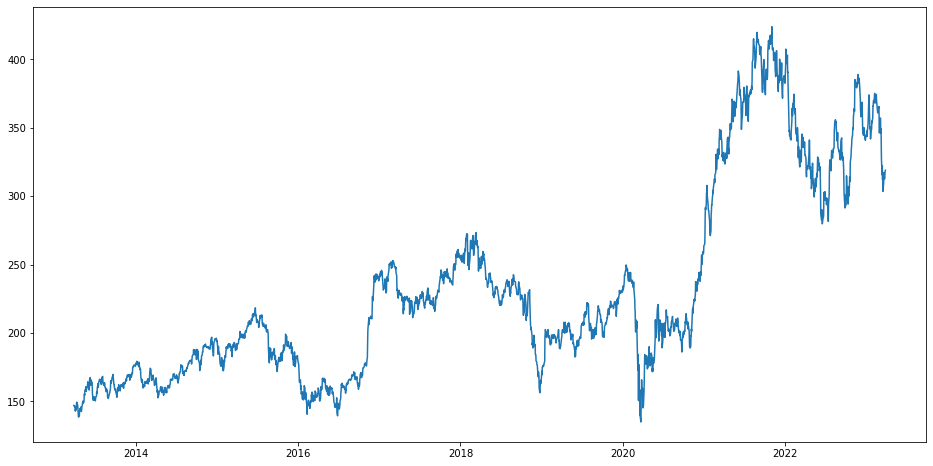

Epoch 1/3
280/280 [==============================] - 32s 75ms/step - loss: 0.0028
Epoch 2/3
280/280 [==============================] - 23s 81ms/step - loss: 5.0030e-04
Epoch 3/3
8/8 [==============================] - 2s 18ms/step
GS rmse_error: 8.7803176590904
GS mean absolute error: 7.011724342862923


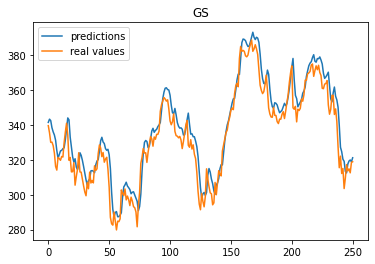

WFC


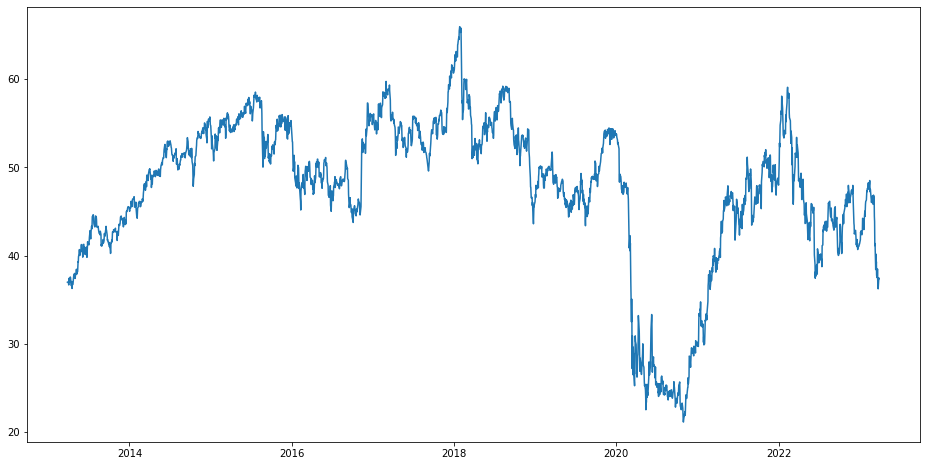

Epoch 1/3
280/280 [==============================] - 30s 73ms/step - loss: 0.0087
Epoch 2/3
280/280 [==============================] - 20s 73ms/step - loss: 7.5459e-04
Epoch 3/3
8/8 [==============================] - 2s 29ms/step
WFC rmse_error: 1.1593340147951645
WFC mean absolute error: 0.9179180798777546


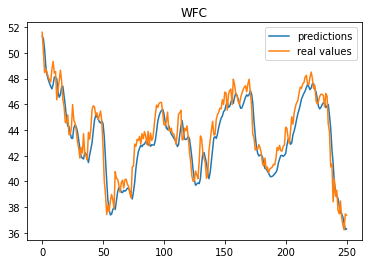

GOOGL


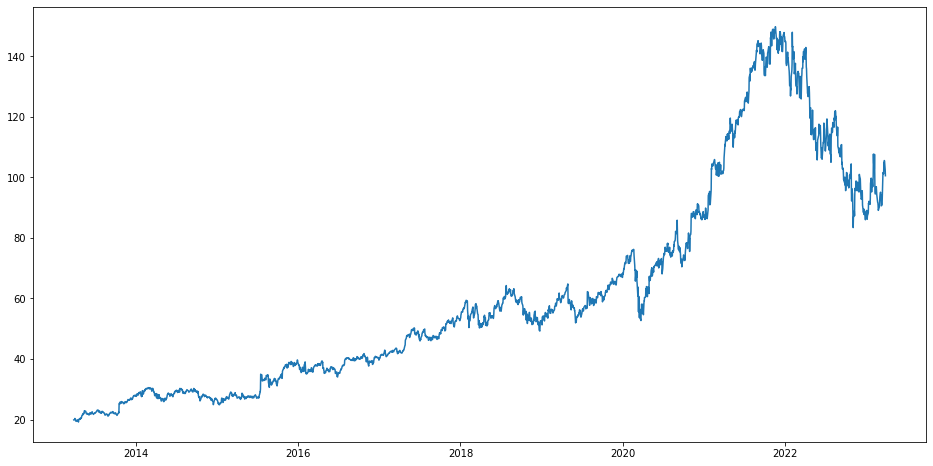

Epoch 1/3
280/280 [==============================] - 41s 93ms/step - loss: 0.0035
Epoch 2/3
280/280 [==============================] - 25s 90ms/step - loss: 3.4558e-04
Epoch 3/3
8/8 [==============================] - 2s 22ms/step
GOOGL rmse_error: 3.6391421772553088
GOOGL mean absolute error: 2.936593226702565


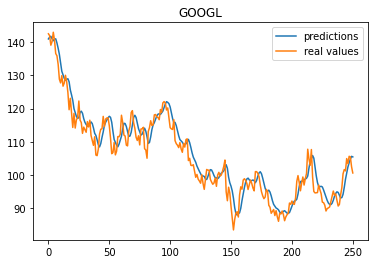

META


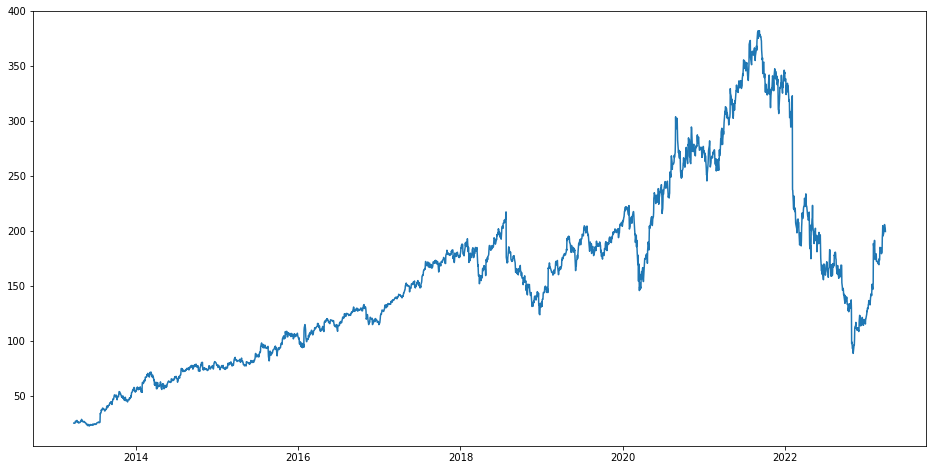

Epoch 1/3
280/280 [==============================] - 33s 81ms/step - loss: 0.0050
Epoch 2/3
280/280 [==============================] - 22s 79ms/step - loss: 4.5097e-04
Epoch 3/3
8/8 [==============================] - 2s 28ms/step
META rmse_error: 8.912855827335292
META mean absolute error: 6.603724171915852


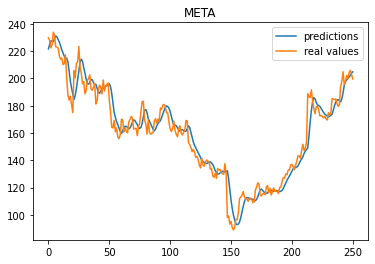

ROKU


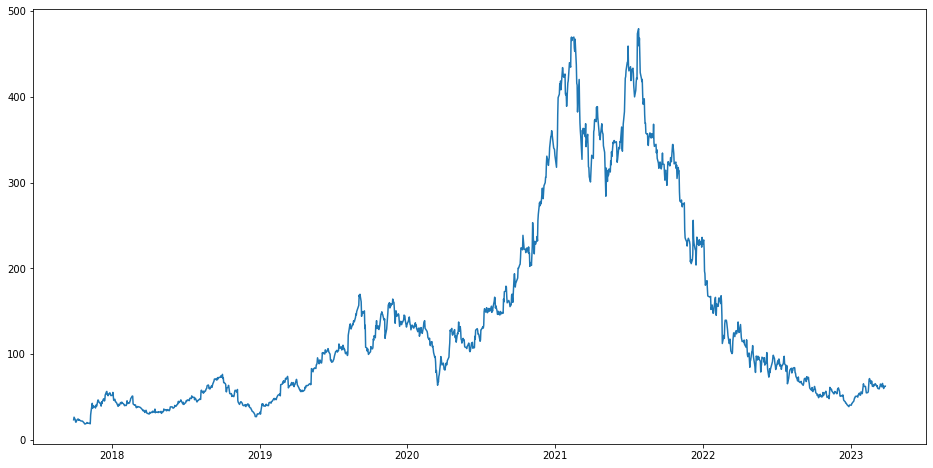

Epoch 1/3
152/152 [==============================] - 29s 88ms/step - loss: 0.0059
Epoch 2/3
152/152 [==============================] - 14s 90ms/step - loss: 0.0011
Epoch 3/3
5/5 [==============================] - 2s 23ms/step
ROKU rmse_error: 4.596807702126314
ROKU mean absolute error: 3.78017480822577


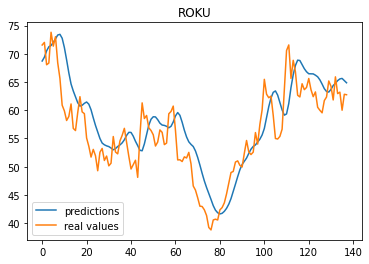

In [167]:
for i in range(len(comp_list)):
  run_model_company(i)

In [168]:
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_16 (GRU)                (None, 60, 32)            3360      
                                                                 
 gru_17 (GRU)                (None, 60, 32)            6336      
                                                                 
 gru_18 (GRU)                (None, 60, 32)            6336      
                                                                 
 gru_19 (GRU)                (None, 32)                6336      
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________
None


## google

In [80]:
import seaborn as sns
from keras.optimizers import Adam
from keras.layers import GRU, Dense

In [7]:
google = stock_data[2]
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-03-28,20.119869,20.154404,19.852352,19.874624,19.874624,91420488
2013-04-01,19.895145,20.076326,19.851101,20.049801,20.049801,72219708
2013-04-02,20.133635,20.391142,20.120119,20.346346,20.346346,81578340
2013-04-03,20.356857,20.375376,20.036787,20.175175,20.175175,69470460
2013-04-04,20.126375,20.163914,19.802301,19.896646,19.896646,97806096


<Axes: >

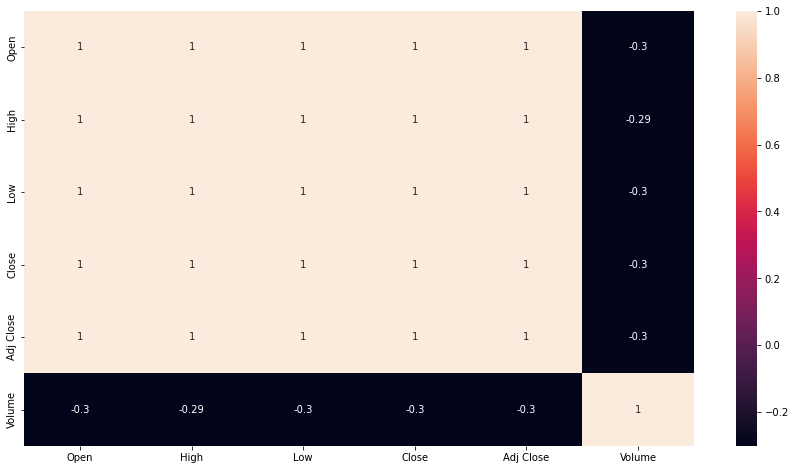

In [25]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(google.corr(), annot=True )

In [29]:
X = google[['Close', 'Volume']]
y = google['Close']

In [34]:
y.head()


Date
2013-03-28    19.874624
2013-04-01    20.049801
2013-04-02    20.346346
2013-04-03    20.175175
2013-04-04    19.896646
Name: Close, dtype: float64

In [8]:
google.shape

(2517, 6)

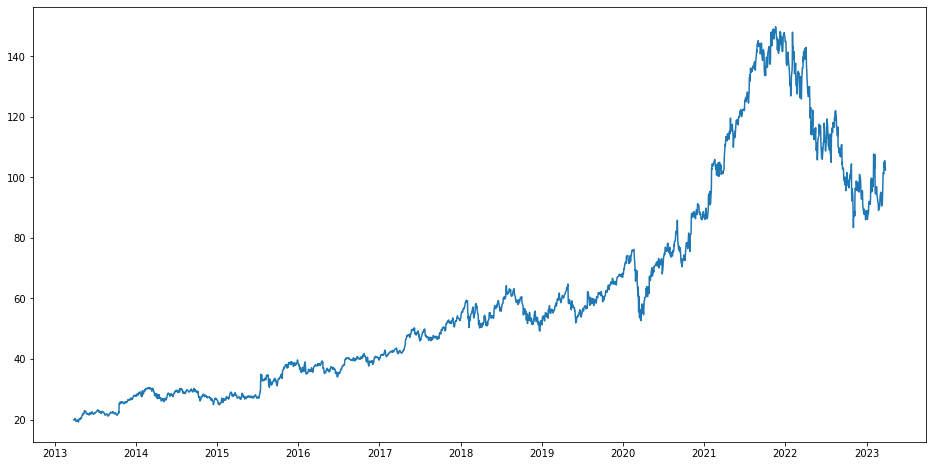

In [9]:
plt.figure(figsize=(16,8))
plt.plot(google['Close'])
plt.show()

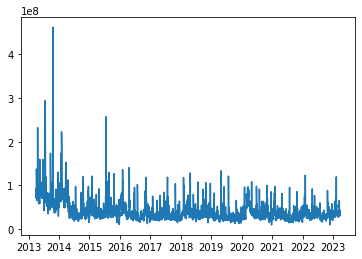

In [16]:
plt.plot(google['Volume'])

In [62]:
def create_loss_graph(history):
  plt.plot(history.history['loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

In [63]:
google_close_df = google.filter(['Close'])
google_data = google_close_df.values
google
print(google_data.shape)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_google = scaler.fit_transform(google_data)


(2517, 1)


In [64]:
training_data_len = int(np.ceil( len(google_data) * .9 ))

In [148]:
train_data = scaled_google[0:training_data_len, : ]
print(train_data.shape)
num_days = 60
x_train = []
y_train = []

for i in range(0, len(train_data) - num_days):
    x_train.append(train_data[i:i + num_days, 0])
    y_train.append(train_data[i+num_days,0])

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape,y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(2266, 1)
(2206, 60) (2206,)
(2206, 60, 1)


In [149]:
x_train.shape[1],1

(60, 1)

Epoch 1/4
276/276 [==============================] - 46s 130ms/step - loss: 0.0108
Epoch 2/4
276/276 [==============================] - 38s 138ms/step - loss: 2.8028e-04
Epoch 3/4
276/276 [==============================] - 39s 141ms/step - loss: 2.6408e-04
Epoch 4/4
276/276 [==============================] - 36s 131ms/step - loss: 2.4311e-04


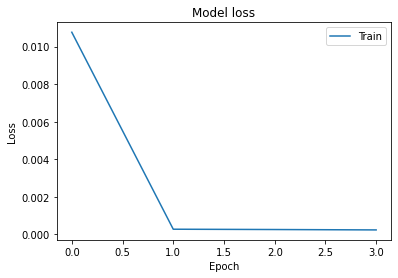

In [151]:
model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(128,return_sequences = False))
# model.add(Dense(32))
# model.add(Dense(1))
model.add(GRU(32,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
adam_optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer= adam_optimizer, loss ='mean_squared_error')
history = model.fit(x_train,y_train,batch_size = 1,epochs = 2)
create_loss_graph(history)

In [159]:
test_data = scaled_google[training_data_len - num_days: , :]
print(len(test_data))
x_test, y_test = [], google_data[training_data_len:,:]
print(len(x_test),y_test.shape)
for i in range(0, len(test_data) -num_days):
  x_test.append(test_data[i:i+num_days,0])
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
pred = model.predict(x_test)
pred_unscaled = scaler.inverse_transform(pred)
rmse_error = np.sqrt(np.mean(((pred_unscaled - y_test) ** 2)))
mean_absolute_error = np.mean(np.absolute(pred_unscaled - y_test))
print("rmse_error:", rmse_error)
print("mean absolute error:", mean_absolute_error)

311
0 (251, 1)
(251, 60)
8/8 [==============================] - 0s 29ms/step
rmse_error: 4.741457979543715
mean absolute error: 3.886977906246109


In [153]:
#predicting for next 10 days
pred_vals = []
pred_days = 10
test_data = scaled_google[training_data_len - num_days: , :]
# y_test = google_data[training_data_len:,:]
x_test_cur=[]
for i in range(0,len(test_data) - num_days - pred_days):
  x_test_cur.append(test_data[i:i+num_days,0])
x_test_cur = np.array(x_test_cur)
x_test_cur = np.reshape(x_test_cur,(x_test_cur.shape[0],x_test_cur.shape[1],1))

for i in range(pred_days):
  pred = model.predict(x_test_cur)
  pred_unscaled = scaler.inverse_transform(pred)
  pred_vals.append(pred_unscaled)
  reshape_pred = np.reshape(pred,(x_test_cur.shape[0],1,1))
  x_test_cur = np.append(x_test_cur,reshape_pred, axis = 1)[:,1:,:]
  print(x_test_cur.shape)




  # x_test_cur = test_data[i:i+num_days, 0]
  # x_test_cur = np.reshape(x_test_cur,(1,x_test_cur.shape[0],1))
  # # print(x_test_cur.shape)
  # pred = model.predict(x_test_cur)
  # pred_unscaled = scaler.inverse_transform(pred)
  # print(f'pred unscaled :{pred_unscaled}')




8/8 [==============================] - 0s 32ms/step
(241, 60, 1)
8/8 [==============================] - 0s 31ms/step
(241, 60, 1)
8/8 [==============================] - 0s 32ms/step
(241, 60, 1)
8/8 [==============================] - 0s 28ms/step
(241, 60, 1)
8/8 [==============================] - 0s 30ms/step
(241, 60, 1)
8/8 [==============================] - 0s 29ms/step
(241, 60, 1)
8/8 [==============================] - 0s 33ms/step
(241, 60, 1)
8/8 [==============================] - 0s 30ms/step
(241, 60, 1)
8/8 [==============================] - 0s 29ms/step
(241, 60, 1)
8/8 [==============================] - 0s 30ms/step
(241, 60, 1)


In [154]:
np_arr = np.array(pred_vals)
np_arr = np.reshape(np_arr, (np_arr.shape[0], np_arr.shape[1]))
pred = np.transpose(np_arr)
print(pred.shape)

(241, 10)


In [155]:
test_data.shape

(311, 1)

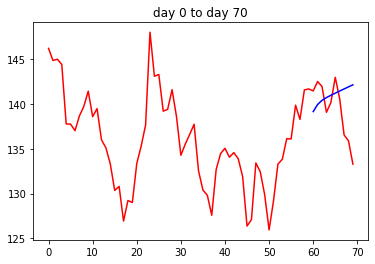

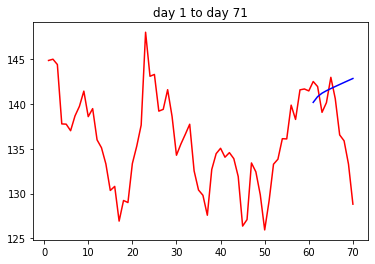

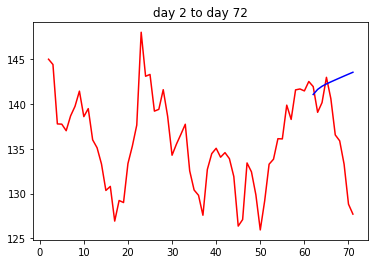

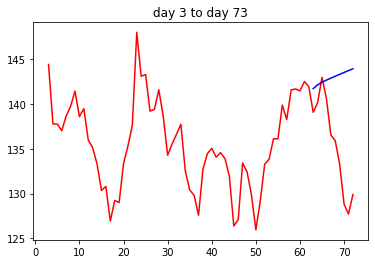

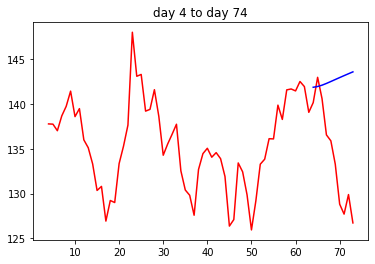

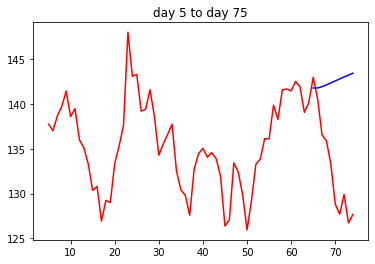

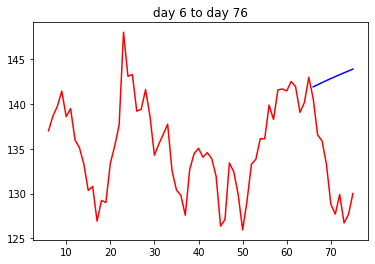

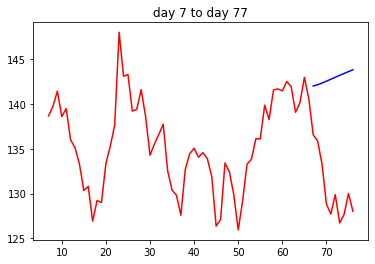

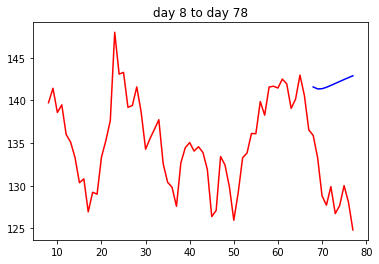

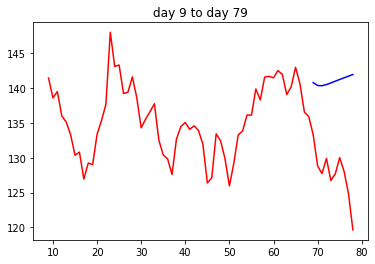

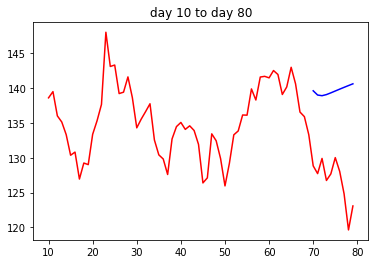

In [156]:
test_data_unscaled = scaler.inverse_transform(test_data)
for i in range(pred.shape[0]):
  if i>10:
    break
  plt.plot([j for j in range(i,i+num_days+ pred_days)],test_data_unscaled[i:i+num_days+ pred_days,:],color= 'red', label = 'real values')
  plt.plot([j for j in range(i+ num_days, i+num_days + pred_days)], pred[i,:], color = 'blue', label = 'predicted')
  plt.title(f'day {i} to day {i+num_days + pred_days}')
  plt.show()

In [157]:
len(test_data) - num_days -  pred_days

241

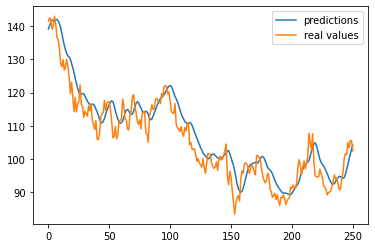

In [160]:
index_array = [i for i in range(pred_unscaled.shape[0])]
plt.plot(index_array,pred_unscaled , label = 'predictions')
plt.plot(index_array, y_test, label = 'real values')
plt.legend()
plt.show()